In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import font_manager
import re

In [170]:
font_path = "C:/Windows/Fonts/Arial.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 문제 해결


In [171]:
# 모든 열을 표시
pd.set_option('display.max_columns', None)

# 모든 행을 표시
pd.set_option('display.max_rows', None)

# 열 너비 제한 해제
pd.set_option('display.width', None)

# 셀 내용 잘림 방지
pd.set_option('display.max_colwidth', None)

In [172]:
# Read raw data
conditions = []
with open('qt_conditions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        conditions.append(line)
    file.close()

species = []
with open('qt_species_list.txt','r') as file:
    i = 0
    for line in file:        
        line = line.strip()
        if i < 9:
            line = line[2:]
        else:
            line = line[3:]
        species.append(line)
        i += 1
    file.close()

reactions = []
with open('qt_reactions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        reactions.append(line)
    file.close()

df_cd = pd.read_csv('qt_conditions.txt', sep=r'\s+', header=0, names=['Time [s]']+conditions)
df_sp = pd.read_csv('qt_densities.txt', sep=r'\s+', header=0, names=['Time [s]']+species)
df_rx = pd.read_csv('qt_rates.txt', sep=r'\s+', header=0, names=['Time [s]']+reactions)

In [173]:
rdf_sp = df_sp.copy()

In [174]:
t = df_sp['Time [s]']
CH4 = (df_sp['CH4'] + df_sp['CH4(V13)'] + df_sp['CH4(V24)'])/const.N_A
C2H6 = (df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'])/const.N_A
C2H4 = (df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'])/const.N_A
C2H2 = (df_sp['C2H2'] + df_sp['C2H2(V13)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V5)'])/const.N_A
C3H6 = (df_sp['C3H6'] + df_sp['C3H6(V)'])/const.N_A
C3H8 = (df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'])/const.N_A
C4H10 = df_sp['C4H9H']/const.N_A
H2 = (df_sp['H2'])/const.N_A


conv = [0]
S_H2 = [0]
S_C2H6 = [0]
S_C2H4 = [0]
S_C2H2 = [0]
S_C3H8 = [0]
S_C3H6 = [0]
S_C4H10 = [0]

for i in range(1,len(t)):
    conv.append(float((CH4.iloc[0] - CH4.iloc[i]) / CH4.iloc[0] * 100))
    S_H2.append(H2.iloc[i] / (CH4.iloc[0] - CH4.iloc[i]) / 2 * 100)
    S_C2H6.append(2*C2H6.iloc[i] / (CH4.iloc[0] - CH4.iloc[i]) * 100)
    S_C2H4.append(2*C2H4.iloc[i] / (CH4.iloc[0] - CH4.iloc[i]) * 100)
    S_C2H2.append(2*C2H2.iloc[i] / (CH4.iloc[0] - CH4.iloc[i]) * 100)
    S_C3H8.append(3*C3H8.iloc[i] / (CH4.iloc[0] - CH4.iloc[i]) * 100)
    S_C3H6.append(3*C3H6.iloc[i] / (CH4.iloc[0] - CH4.iloc[i]) * 100)
    S_C4H10.append(4*C4H10.iloc[i] / (CH4.iloc[0] - CH4.iloc[i]) * 100)

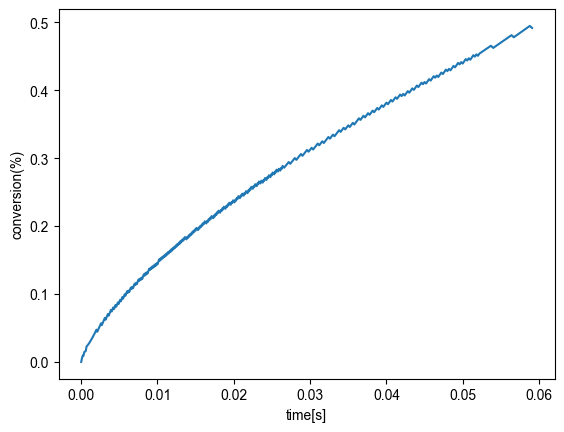

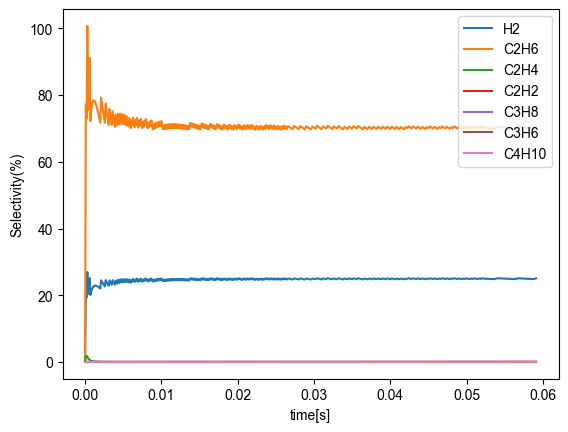

In [175]:
plt.plot(t,conv)
plt.xlabel('time[s]')
plt.ylabel('conversion(%)')
plt.show()

plt.plot(t,S_H2,label='H2')
plt.plot(t,S_C2H6,label='C2H6')
plt.plot(t,S_C2H4,label='C2H4')
plt.plot(t,S_C2H2,label='C2H2')
plt.plot(t,S_C3H8,label='C3H8')
plt.plot(t,S_C3H6,label='C3H6')
plt.plot(t,S_C4H10,label='C4H10')

plt.xlabel('time[s]')
plt.ylabel('Selectivity(%)')
plt.legend()
plt.show()
